In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the file into a variable

In [2]:
pro1_df = pd.read_csv("uber-raw-data-janjune-15.csv.zip")

## Listing the top 15 rows of the file 

In [3]:
pro1_df.head(15)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
5,B02617,2015-05-17 09:47:00,B02617,228
6,B02617,2015-05-17 09:47:00,B02617,7
7,B02617,2015-05-17 09:47:00,B02764,74
8,B02617,2015-05-17 09:47:00,B02617,249
9,B02617,2015-05-17 09:47:00,B02764,22


## Total no of rows present in the data including null value rows

In [4]:
pro1_df.shape[0]

14270479

## To get only the non null values

In [5]:
pro1_df.count()

Dispatching_base_num    14270479
Pickup_date             14270479
Affiliated_base_num     14108284
locationID              14270479
dtype: int64

So, from the above cell result and the current cell result, it means there are no null values in Dispatching_base_num column, Pickup_date column, locationID column whereas, there are null values in Affiliated_base_num column.

## Knowing the datatypes

In [6]:
pro1_df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

## Got the names for Dispacthing base nums from the kaggle website.The Base codes are for the following Uber bases

B02512 : Unter,
 B02598 : Hinter,
 B02617 : Weiter,
 B02682 : Schmecken,
 B02764 : Danach-NY, 
 B02765 : Grun,
 B02835 : Dreist,
 B02836 : Drinnen

<!-- # To assign appropriate names to the dispatching base num:
# Firstly, I got these names from the Kaggle website where the dataset is present.Below are the names from the website:
# B02512 : Unter
# B02598 : Hinter
# B02617 : Weiter
# B02682 : Schmecken
# B02764 : Danach-NY
# B02765 : Grun
# B02835 : Dreist
# B02836 : Drinnen
# To assign these names, I want to add a new column -->

In [7]:
# Adding a new column, 'Dispatching_base_names' to populate the correct names for all the dispatching nums
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02512','Dispatching_base_names'] = 'Unter'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02598','Dispatching_base_names'] = 'Hinter'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02617','Dispatching_base_names'] = 'Weiter'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02682','Dispatching_base_names'] = 'Schmecken'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02764','Dispatching_base_names'] = 'Danach-NY'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02765','Dispatching_base_names'] = 'Grun'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02835','Dispatching_base_names'] = 'Dreist'
pro1_df.loc[pro1_df['Dispatching_base_num'] == 'B02836','Dispatching_base_names'] = 'Drinnen'

# Checking the data
pro1_df.sample(10)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Dispatching_base_names
9230395,B02682,2015-06-07 23:55:00,B02682,132,Schmecken
12271905,B02765,2015-05-12 19:25:00,B02749,210,Grun
648685,B02682,2015-02-11 22:56:36,B02764,255,Schmecken
4609320,B02764,2015-04-02 21:58:00,B00053,161,Danach-NY
11523970,B02764,2015-04-13 08:23:00,B02764,37,Danach-NY
11953058,B02764,2015-04-28 18:36:00,B02764,224,Danach-NY
1263526,B02598,2015-02-05 16:15:10,B02598,138,Hinter
10707228,B02682,2015-03-14 19:24:00,B02598,186,Schmecken
6213477,B02617,2015-01-13 08:18:03,B02617,158,Weiter
2446409,B02764,2015-01-15 22:34:43,B02764,162,Danach-NY


New column with appropriate values are added to the original data

## To find which days of the week (Mon, tues..), which week(1,2,..) and which month(jan, feb,..jun) all the pickup dates were:

In [8]:
# for that, first, I am converting pickup_date column type from object to datetime.
pro1_df['Pickup_date']=pro1_df['Pickup_date'].astype('datetime64[ns]')
pro1_df.sample(10)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Dispatching_base_names
1278873,B02764,2015-06-20 22:33:00,B02764,231,Danach-NY
3131362,B02598,2015-02-27 16:36:49,B02598,164,Hinter
2725859,B02682,2015-02-20 19:45:29,B02682,68,Schmecken
3747176,B02598,2015-03-03 20:16:00,B02598,230,Hinter
12939104,B02765,2015-03-21 20:24:00,B02765,140,Grun
1197205,B02682,2015-02-13 14:15:30,B02682,161,Schmecken
2781729,B02764,2015-06-14 20:51:00,B02764,80,Danach-NY
9078386,B02617,2015-02-04 14:49:10,B02617,151,Weiter
11628322,B02764,2015-06-01 02:05:00,B02764,138,Danach-NY
14068140,B02764,2015-01-04 01:45:46,B02764,249,Danach-NY


In [9]:
# dt = datetime.now()
from datetime import datetime

# Adding a new column 'Day' to get the day names for all the pickup dates.
pro1_df['Day']=pro1_df['Pickup_date'].dt.day_name()

# Adding a new column 'Week' to get the week for all the pickup dates.
pro1_df['Week']=pro1_df['Pickup_date'].dt.week

# Adding a new column 'Month' to get the month names for all the pickup dates.
pro1_df['Month']=pro1_df['Pickup_date'].dt.month_name()

pro1_df.sample(10)

C:\Users\SNIGDH~1.CHI\AppData\Local\Temp/ipykernel_5724/1085764159.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pro1_df['Week']=pro1_df['Pickup_date'].dt.week


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Dispatching_base_names,Day,Week,Month
8396790,B02617,2015-01-30 19:56:36,B02617,148,Weiter,Friday,5,January
4983528,B02764,2015-06-26 00:57:00,B02764,164,Danach-NY,Friday,26,June
9345285,B02764,2015-02-28 01:47:25,B02764,249,Danach-NY,Saturday,9,February
9811554,B02598,2015-06-03 07:27:00,B02598,158,Hinter,Wednesday,23,June
1257596,B02682,2015-05-20 15:00:00,B02682,170,Schmecken,Wednesday,21,May
5362689,B02682,2015-06-27 04:51:00,B02682,252,Schmecken,Saturday,26,June
10779517,B02598,2015-06-27 17:34:00,B02598,50,Hinter,Saturday,26,June
10021578,B02617,2015-02-16 18:43:40,B02617,137,Weiter,Monday,8,February
1937225,B02764,2015-06-11 02:20:00,B02729,68,Danach-NY,Thursday,24,June
13695957,B02765,2015-06-25 17:59:00,B02492,68,Grun,Thursday,26,June


## Grouping by dispatching_base_num and locationID

In [10]:
# first, it groups by dispatching_base_num and then by locationID
pro1_df.groupby(['Dispatching_base_num','locationID']).size()

Dispatching_base_num  locationID
B02512                1                3
                      3               23
                      4             1233
                      5                1
                      6               23
                                    ... 
B02836                258              2
                      260             11
                      261              4
                      262              4
                      263             13
Length: 1946, dtype: int64

In [11]:
# grouping by dispatching_base_num and locationID and resetting the index of the dataframe

# In the above cell, the result is in the form of a multi index format, so by applying '.reset_index()' we are
# returning the dataframe that has a seperate index column starting from zero in the left most corner.
pro1_df_2=pro1_df.groupby(['Dispatching_base_num','locationID']).size().reset_index(name='total_count')
pro1_df_2

,Dispatching_base_num,locationID,total_count
0,B02512,1,3
1,B02512,3,23
2,B02512,4,1233
3,B02512,5,1
4,B02512,6,23
...,...,...,...
1941,B02836,258,2
1942,B02836,260,11
1943,B02836,261,4
1944,B02836,262,4


## To find which dispatching_base_num appeared more maximum number of times along with its names:

In [12]:
# to do this,first groupby dispatching_base_num and Dispatching_base_names and then sort values in 
# descending order by column 'count'
pro1_df_5=pro1_df.groupby(['Dispatching_base_num','Dispatching_base_names']).size().reset_index(
                                   name='count').sort_values(by='count',ascending=False)

# Here, groupby of only Dispatching num and groupby of both Dispatching num and Dispatching names are same becasue,
# I know from the original data that each Dispatching num has only one dispatching name associated with it. 
pro1_df_5

,Dispatching_base_num,Dispatching_base_names,count
4,B02764,Danach-NY,5753653
3,B02682,Schmecken,3484530
2,B02617,Weiter,2068525
1,B02598,Hinter,1526660
5,B02765,Grun,1152727
0,B02512,Unter,255772
6,B02835,Dreist,26622
7,B02836,Drinnen,1990


1. There are a total of 8 dispatching base num in the data
2. 'B02764' is the highest dispatching base unit

## Plotting using a pie diagram to see how these Dispatching nums are distributed in the data

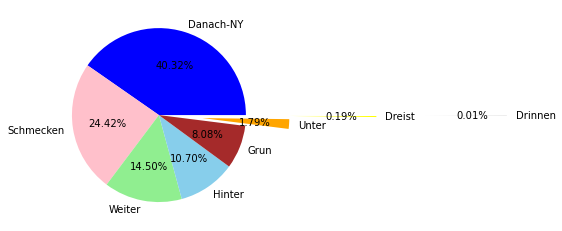

In [13]:
# giving the names for labels
pie_labels=["Danach-NY","Schmecken","Weiter","Hinter","Grun","Unter","Dreist","Drinnen"]

# Giving colors
pie_colors=["blue","pink","lightgreen","skyblue","brown","orange","yellow","black"]

# Making the parts of the pie diagram to move away from the center with the mentioned scale. Here, I used explode
# only for last three values so as to make it easy to comprehend as their percentages are very low.
pie_explode=[0,0,0,0,0,0.5,1.5,3]

plt.pie(pro1_df_5['count'],labels=pie_labels,colors=pie_colors,explode=pie_explode,autopct="%1.2f%%")
# I used, "1.2f" inorder to get two values after the decimal point. 

plt.show()

'Drinnen' uber base has the least percentage of 0.01%, so we can say that its contribution to the total no of dispatches is very negligible. And thus we can say that the uber service availabilty through that base is very limited. 

## To find which locationID has the highest count

In [14]:
# first doing groupby locationID and then sorting by count in descending order, so we get the first record as the
# locationID which has the highest count
pro1_df_4=pro1_df.groupby(['locationID']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pro1_df_4

,locationID,count
158,161,460732
227,231,420356
230,234,419045
78,79,407591
245,249,323989
...,...,...
102,105,12
98,99,9
1,2,8
260,264,7


## Now, for the locationID ='161' which has the highest count, I want to check all the Dispatching_base_num

In [15]:
# So, I am extracting only the distinct Dispatching_base_num where locationID='161'
pro1_df_6=pd.DataFrame(pro1_df[pro1_df['locationID']==161]['Dispatching_base_num'].unique())
pro1_df_6 

,0
0,B02617
1,B02598
2,B02764
3,B02682
4,B02512
5,B02765
6,B02835
7,B02836


So above are the Dispatching base num for locationID '161'.And from the previous results above ,I observe that this contains all the dispatching nums. So that means all dispatching bases dispatch uber services to locationID ='161'

## Now, I want to find which out of the above dispatching nums is the highest contributing Dispatching_base_num for location '161'

In [16]:
# Since the data is huge, I am first filtering the original data by locationID='161' and writing it to a file
pro1_df_7=pd.DataFrame(pro1_df[pro1_df['locationID']==161])
pro1_df_7.to_excel("project1_firstfile.xlsx")

# Reading this file into a new variable
pro1_df_8=pd.read_excel("project1_firstfile.xlsx")

In [17]:
# Now, if I groupby Dispatching num then I will get the dispatching base num for locationID =161 which contributed 
# most towards the high count
pro1_df_9=pro1_df_8.groupby(['Dispatching_base_num']).size().reset_index(name='count').sort_values(by='count',ascending=
                                                                                                  False)
pro1_df_9

,Dispatching_base_num,count
4,B02764,179389
3,B02682,105078
2,B02617,72700
1,B02598,56481
5,B02765,35014
0,B02512,11296
6,B02835,720
7,B02836,54


Above is the highest Dispatching num 'B02764'. This order of dispatching nums is similar to the results obtained when I grouped by Disptaching_base_num
So, I want to check for another locationID to see if this pattern works for that locationID as well or not

## I want to try for the least count of locationID.

In [18]:
# To find out that, I am calling the varaible pro1_df_3 where I stored the results of groupby locationID
pro1_df_4.tail(1)

,locationID,count
107,110,2


Count is only 2 that means not all locationID's are associated with all the Dispatching nums

## However, if I wish to find out the Dispatching num contributing to higher count for this locationID '110':

In [19]:
# Since the data is huge, I am first filtering the original data by locationID='110' and writing it to a file
pro1_df_10=pd.DataFrame(pro1_df[pro1_df['locationID']==110])
pro1_df_10.to_excel("project1_secondfile.xlsx")

# Reading this file into a new variable
pro1_df_11=pd.read_excel("project1_secondfile.xlsx")

# Doing groupby to find the most contributing Dispatching num for locationID ='110'
pro1_df_12=pro1_df_10.groupby(['Dispatching_base_num']).size().reset_index(name='count').sort_values(by='count',ascending=
                                                                                                  False)
pro1_df_12

,Dispatching_base_num,count
0,B02598,2


Interestingly, 'B02598' is the only Dispatching base num for the locationID '110'

## Which three dates have the highest traffic?

In [20]:
# first, groupby and then sorting in descending order will work. But before that, I need to first get
# date from the datetime. For that,now, adding a new column to get only the date
pro1_df['Pickupdate']=pd.to_datetime(pro1_df['Pickup_date']).dt.date
pro1_df.sample(10)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Dispatching_base_names,Day,Week,Month,Pickupdate
13021447,B02765,2015-06-03 07:55:00,B01998,233,Grun,Wednesday,23,June,2015-06-03
6198378,B02682,2015-04-25 23:16:00,B02682,90,Schmecken,Saturday,17,April,2015-04-25
8777851,B02682,2015-01-16 18:10:46,B02764,161,Schmecken,Friday,3,January,2015-01-16
5824089,B02764,2015-04-23 11:19:00,B00296,262,Danach-NY,Thursday,17,April,2015-04-23
2232644,B02764,2015-04-17 23:44:00,B02764,87,Danach-NY,Friday,16,April,2015-04-17
8991190,B02617,2015-03-26 16:57:00,B02617,200,Weiter,Thursday,13,March,2015-03-26
6330751,B02764,2015-02-27 18:38:45,B01875,170,Danach-NY,Friday,9,February,2015-02-27
6751622,B02617,2015-03-04 10:52:00,B02617,95,Weiter,Wednesday,10,March,2015-03-04
6678256,B02682,2015-04-27 18:20:00,B02682,246,Schmecken,Monday,18,April,2015-04-27
5467578,B02682,2015-06-27 11:57:00,B02682,170,Schmecken,Saturday,26,June,2015-06-27


In [21]:
# Now doing groupby for that new column

# Here, I prefer to get the day names as well, so I am grouping by pickupdate and day. Since one particular date will have 
# only name for it, doing groupby by only pickupdate is same as doing groupby for both pickupdate and day.
pro1_df_14= pro1_df.groupby(['Pickupdate','Day']).size().reset_index(name='count').sort_values(by='count',ascending=False)

# To find the three dates and which days have the highest traffic:
pro1_df_14.head(3)

,Pickupdate,Day,count
177,2015-06-27,Saturday,136193
135,2015-05-16,Saturday,121557
114,2015-04-25,Saturday,106270


It is clear that Saturdays are the most busiest days of the week.

In [22]:
pro1_df_15=pro1_df_14.head(10)
pro1_df_15

,Pickupdate,Day,count
177,2015-06-27,Saturday,136193
135,2015-05-16,Saturday,121557
114,2015-04-25,Saturday,106270
121,2015-05-02,Saturday,104978
149,2015-05-30,Saturday,104429
162,2015-06-12,Friday,103052
50,2015-02-20,Friday,102762
44,2015-02-14,Saturday,102347
161,2015-06-11,Thursday,102013
155,2015-06-05,Friday,101922


 Also, It can be seen that in the top 10 pickups done, Saturdays takes 6 places, contributing to 60% of the top 10 pickups.

## Plotting the number of pickups for the top 10 days

<AxesSubplot:title={'center':'Total no of pickups for top 10 dates'}, ylabel='Pickupdate'>

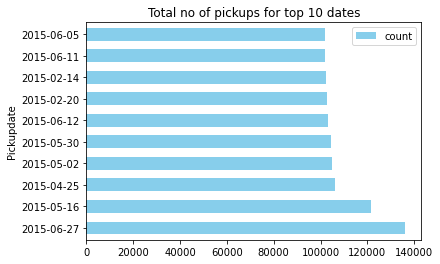

In [23]:
# Plotting a horizontal bar chart with'Pickupdate' in y-axis and 'Total no of pickups' which is nothing but the 'count' 
# as x-axis and width of each bar to be as 0.6
pro1_df_15.plot.barh(x='Pickupdate',y='count',width= 0.6, color = 'skyblue' ,title= 'Total no of pickups for top 10 dates')

## To find the week which has maximum pickups

In [24]:
# To find that, groupby by week would give the result
pro1_df_16= pro1_df.groupby(['Week']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pro1_df_16

,Week,count
25,26,688860
22,23,665891
24,25,661231
23,24,643856
19,20,642943
21,22,615880
16,17,615653
7,8,582744
6,7,581560
20,21,580435


It is observable that week 26, 23 and 25 i.e. june month contributes highest to the uber pickups.

## Plotting the total uber rides weekly 

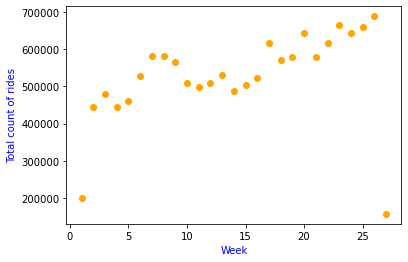

In [25]:
plt.xlabel('Week',color='blue')
plt.ylabel('Total count of rides',color='blue')
plt.scatter(pro1_df_16['Week'],pro1_df_16['count'], color= 'orange')
plt.show()

It is noticable that between the weeks, 10 to 26, the grpah gradually increased, more like linearly.

## To find the Month wise pickups

In [26]:
# To find that,doing groupby by month 
pro1_df_17= pro1_df.groupby(['Month']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pro1_df_17

,Month,count
3,June,2816895
5,May,2695553
0,April,2280837
1,February,2263620
4,March,2259773
2,January,1953801


## Plotting the total uber rides month wise

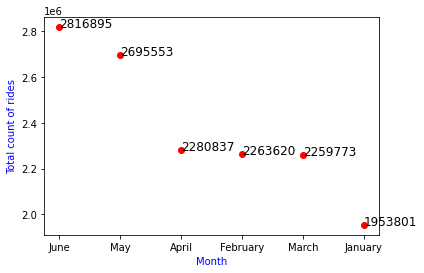

In [27]:
plt.xlabel('Month',color='blue')
plt.ylabel('Total count of rides',color='blue')
plt.scatter(pro1_df_17['Month'],pro1_df_17['count'], color= 'red')


# Using enumerate, so that it iterates and returns the iterated value
for i,v in enumerate(pro1_df_17['count']):
    plt.text(i,v,str(v),size=12)
    
plt.show()
# references: https://www.geeksforgeeks.org/enumerate-in-python/

It is noticable that the total pickups for the months, February, March and April were almost constant.

### To know the peak hours for uber business:

In [28]:
# value_counts() gives me the how many times that particular instance is repeated in the data set.
pro1_df['Pickup_date'].value_counts().head(20)

2015-06-27 22:19:00    213
2015-06-27 20:52:00    213
2015-06-27 21:36:00    210
2015-06-27 22:14:00    207
2015-06-27 19:43:00    204
2015-06-27 22:02:00    203
2015-06-27 21:12:00    202
2015-06-27 23:09:00    201
2015-05-16 21:45:00    201
2015-06-27 22:10:00    201
2015-06-27 19:32:00    200
2015-05-16 22:24:00    200
2015-06-27 22:33:00    200
2015-06-27 22:09:00    200
2015-06-27 23:28:00    199
2015-06-27 22:01:00    199
2015-06-27 22:22:00    198
2015-06-27 21:06:00    198
2015-06-27 21:15:00    197
2015-06-27 23:41:00    197
Name: Pickup_date, dtype: int64

So, its like at 22:19 on Jun 27, 2015, there were 213 pickups done by uber and this along with 20:52 on the same day are
the highest instances of uber pickups/uber service.

Also, an insight that can be drawn from the above result is that; Jun 27, 2015 which is a saturday weekend (known from 
groupby results from previous cells) has the highest uber traffic from 19:32 till 23:09.

# PART B

In [29]:
import numpy as np
import seaborn as sns

### Plotting the graph for highest pickup date, 27-Jun-2015 to check the activity trend for that date.

To check activity throughout the day, I first need time. But I know from the above results that the time is varying in minutes and plotting for every minute in a day does not add much value so, I want to plot for every hour in that day.

In [30]:
# So I will add time_hrs column to get time in hours from datetime column, Pickup_date.
pro1_df['Time_hrs'] = pd.to_datetime(pro1_df['Pickup_date']).dt.hour

# Converting pickupdate column to datetime so that it's easier to filter.
pro1_df['Pickupdate'] = pro1_df['Pickupdate'].astype('datetime64[ns]')

In [31]:
# Now, I need to filter where pickupdate=27th jun and getting only 'Time_hrs' column. 
pro1_df_18 = pd.DataFrame(pro1_df[pro1_df['Pickupdate']=='2015-06-27'])['Time_hrs']

# And since data is huge, I will write it to a file
pro1_df_18.to_excel("project1_thirdfile.xlsx")

# Reading this file into a new variable
pro1_df_19 = pd.read_excel("project1_thirdfile.xlsx")

In [32]:
# Atlast, doing groupby by 'Time_hrs'

# Here, I am sorting by 'Time_hrs' so that, its easier to understand the graph in terms of day starting till night.
pro1_df_20 = pro1_df_19.groupby(['Time_hrs']).size().reset_index(name='count').sort_values(by='Time_hrs')
pro1_df_20

,Time_hrs,count
0,0,7588
1,1,5717
2,2,4246
3,3,3350
4,4,2557
5,5,1356
6,6,1353
7,7,1499
8,8,2056
9,9,2662


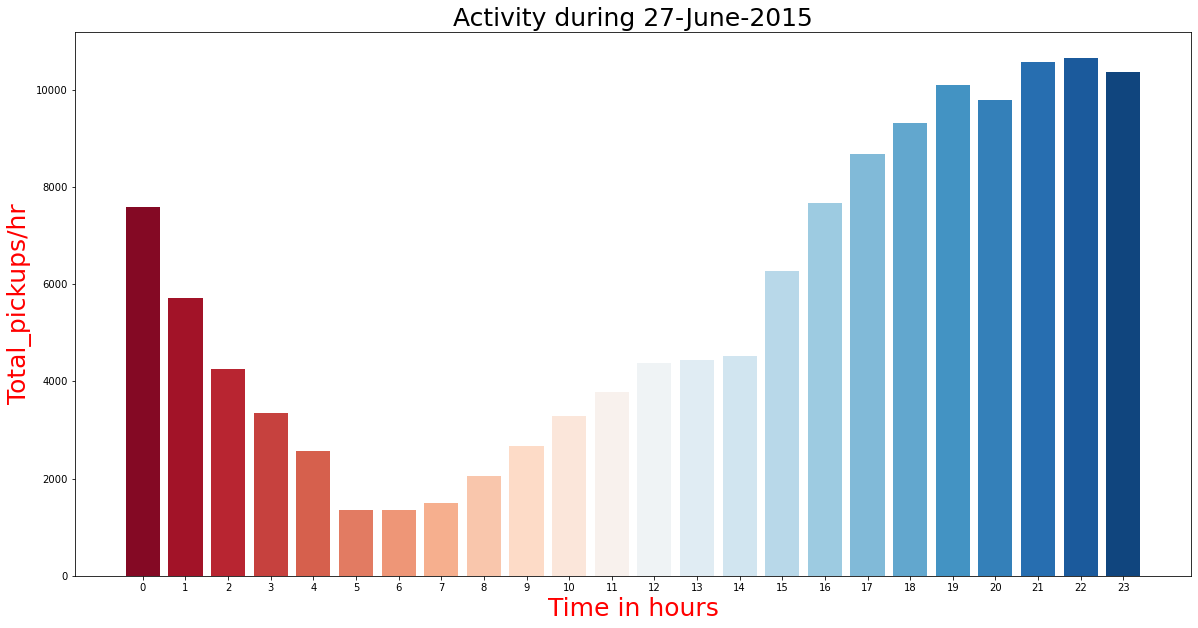

In [33]:
# Plotting a bar graph
plt.figure(figsize=(20,10))

# Adding title, x & y labels
plt.title("Activity during 27-June-2015", size=25)
plt.xlabel('Time in hours',size=25,color='red')
plt.ylabel('Total_pickups/hr',size=25,color='red')

# Adding colors from seaborn library with palette,'muted'
color_sns_bar = sns.color_palette("RdBu",24)

# Adding the x-axis values in the graph
plt.xticks(pro1_df_20['Time_hrs'])

plt.bar(pro1_df_20['Time_hrs'],pro1_df_20['count'],color=color_sns_bar)
plt.show()
# references:- https://www.codecademy.com/article/seaborn-design-ii

1. First thing, I can observe is that, the activity is high during the second half i.e from late evening till night of the    day.
2. The peak activity occured at 10PM of that day.
3. I can seen that the activity for the first 5 hrs in the day decreased gradually.
4. Then from 5AM till 2PM, the activity increased gradually.
5. After 2PM, there is a sudden incraese in uber pickups and this trend continued till 7PM. 

Before moving forward, I want to add three more columns:
1. 'Week_day_num': I am using .dt.weekday which has values, Mon = 0, Tue = 1, Wed =2,...Sun = 6
2. 'Month_day_num': I am using .dt.day to get the day number for a month i.e, 2015-01-28 will have the value,'28'
    and 2015-05-01 will have the value,'1' and 2015-03-31 will have the value.'31'
3. 'Month_num' : I am using .dt.month to get the month number like, jan =1, feb =2..

In [34]:
pro1_df['Week_day_num'] = pd.to_datetime(pro1_df['Pickup_date']).dt.weekday
pro1_df['Month_day_num'] = pd.to_datetime(pro1_df['Pickup_date']).dt.day
pro1_df['Month_num'] = pd.to_datetime(pro1_df['Pickup_date']).dt.month
pro1_df.sample(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Dispatching_base_names,Day,Week,Month,Pickupdate,Time_hrs,Week_day_num,Month_day_num,Month_num
3764363,B02682,2015-05-27 19:05:00,B02682,179,Schmecken,Wednesday,22,May,2015-05-27,19,2,27,5
12920684,B02765,2015-03-21 06:43:00,B02765,223,Grun,Saturday,12,March,2015-03-21,6,5,21,3
12730954,B02764,2015-05-03 09:57:00,B02682,112,Danach-NY,Sunday,18,May,2015-05-03,9,6,3,5
2828630,B02682,2015-05-24 18:10:00,B02764,82,Schmecken,Sunday,21,May,2015-05-24,18,6,24,5
11873776,B02764,2015-01-16 09:39:01,B02764,90,Danach-NY,Friday,3,January,2015-01-16,9,4,16,1


Before moving forward, I want to change the columns positions, so that it is easier to read.

In [35]:
# Storing the existing columns as a list in a variable 
pro1_df_columns = list(pro1_df.columns)
pro1_df_columns

['Dispatching_base_num',
 'Pickup_date',
 'Affiliated_base_num',
 'locationID',
 'Dispatching_base_names',
 'Day',
 'Week',
 'Month',
 'Pickupdate',
 'Time_hrs',
 'Week_day_num',
 'Month_day_num',
 'Month_num']

In [36]:
# Changing the order of the columns
pro1_df_columns_new = ['Dispatching_base_num',
 'Dispatching_base_names',
 'Pickup_date',
 'Pickupdate',
 'Time_hrs',
 'Day',
 'Week_day_num',
 'Month_day_num',
 'Week',
 'Month',
 'Month_num',
 'Affiliated_base_num',
 'locationID']
pro1_df_columns_new

['Dispatching_base_num',
 'Dispatching_base_names',
 'Pickup_date',
 'Pickupdate',
 'Time_hrs',
 'Day',
 'Week_day_num',
 'Month_day_num',
 'Week',
 'Month',
 'Month_num',
 'Affiliated_base_num',
 'locationID']

In [37]:
# re-indexing the columns by passing the new list of columns to the original dataframe
pro1_df = pro1_df.reindex(columns = pro1_df_columns_new)

# Checking the data
pro1_df.sample(5)

,Dispatching_base_num,Dispatching_base_names,Pickup_date,Pickupdate,Time_hrs,Day,Week_day_num,Month_day_num,Week,Month,Month_num,Affiliated_base_num,locationID
3346369,B02682,Schmecken,2015-04-14 19:38:00,2015-04-14,19,Tuesday,1,14,16,April,4,B02682,170
12129517,B02765,Grun,2015-05-08 20:49:00,2015-05-08,20,Friday,4,8,19,May,5,B02764,162
6038942,B02682,Schmecken,2015-03-03 23:47:00,2015-03-03,23,Tuesday,1,3,10,March,3,B02682,161
7517499,B02764,Danach-NY,2015-02-27 12:34:39,2015-02-27,12,Friday,4,27,9,February,2,B02764,76
6866313,B02764,Danach-NY,2015-04-11 01:51:00,2015-04-11,1,Saturday,5,11,15,April,4,B02764,83


The columns are re-indexed in the order I gave. 

### To check and plot the graph for how uber pickups are distributed for all the days of the week i.e, pickups done on sun,mon..sat

In [38]:
# Groupby Day and Week_day_num, and sorting by Week_day_num will give the results in weekly order.
pro1_df_21 = pro1_df.groupby(['Day','Week_day_num']).size().reset_index(name='count').sort_values(
                                                                 by = 'Week_day_num')
pro1_df_21

,Day,Week_day_num,count
1,Monday,0,1694252
5,Tuesday,1,1872902
6,Wednesday,2,1893811
4,Thursday,3,2159598
0,Friday,4,2282571
2,Saturday,5,2414563
3,Sunday,6,1952782


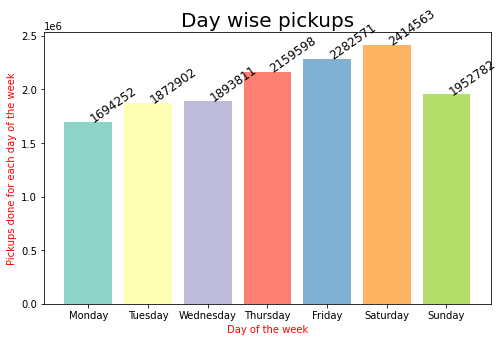

In [39]:
# Plotting the graph for above results
plt.figure(figsize=(8,5))

# Adding title,x & y labels
plt.title("Day wise pickups", size = 20)
plt.xlabel("Day of the week", color = 'red')
plt.ylabel("Pickups done for each day of the week", color = 'red')

# Adding colors
colors_sns_bar_1 = sns.color_palette("Set3",7)

# Using enumerate to get the value for the plots and rotating the text by 35 degree.
for i,v in enumerate(pro1_df_21['count']):
    plt.text(i,v,str(v), size=12, rotation=35)
    
plt.bar(pro1_df_21['Day'],pro1_df_21['count'], color = colors_sns_bar_1)
plt.show()
# references: https://www.geeksforgeeks.org/enumerate-in-python/

It can be noticed that Saturdays and Fridays are the most busiest days of the week followed by Thurdays.

### To know how the pickups are distributed in terms of hours of each day of the week.

Text(0.5, 1.0, 'Distribution of Pickups for each day of the week')

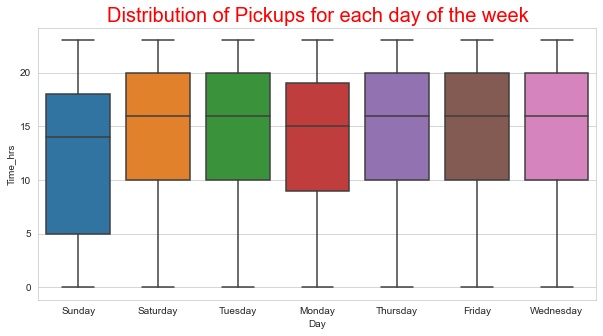

In [40]:
# PLotting boxplot using seaborn.barplot
plt.figure(figsize=(10,5))

sns.set_style("whitegrid")
sns.boxplot(data = pro1_df, x= 'Day', y='Time_hrs')

# Adding title
plt.title("Distribution of Pickups for each day of the week" , size = 20, color= 'red')

It can be observed that:
1. Saturday, Tuesday, Thursday, Friday, Wednesday have the same median. And all days have most pickups between
   10 AM and 8 PM
2. Sunday has most pickups from 5 AM till around 6 PM

### Plotting day wise graph for all the months

In [41]:
# Groupby 'Month_day_num'
pro1_df_22 = pro1_df.groupby(['Month_day_num']).size().reset_index(name='count').sort_values(by='Month_day_num')
pro1_df_22

,Month_day_num,count
0,1,462527
1,2,444579
2,3,449913
3,4,411770
4,5,439934
5,6,460026
6,7,471911
7,8,438822
8,9,447692
9,10,468026


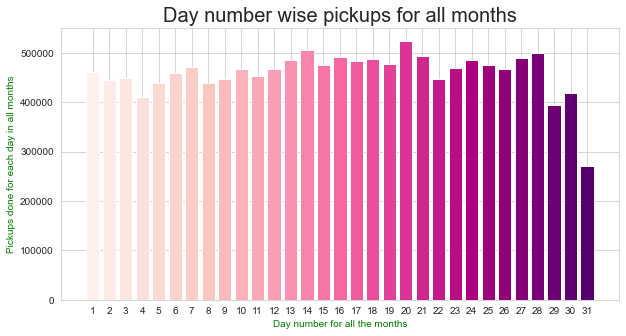

In [42]:
# Plotting the graph
plt.figure(figsize=(10,5))

# Adding title,x & y labels
plt.title("Day number wise pickups for all months", size = 20)
plt.xlabel("Day number for all the months", color = 'green')
plt.ylabel("Pickups done for each day in all months", color = 'green')

# Adding colors
colors_sns_bar_2 = sns.color_palette("RdPu",31)

# Adding the x-axis values in the graph 
plt.xticks(pro1_df_22['Month_day_num'])

plt.bar(pro1_df_22['Month_day_num'],pro1_df_22['count'], color = colors_sns_bar_2)
plt.show()

It can be seen that, in overall i.e for the data from Jan till Jun, 20th day has the highest pickups.

### To Check the daily pickups for quarterly timeperiod, ie. Jan(1,2..31),Feb(1,2..28),Mar(1,2,..31)-- first quarter and Apr(1,2,..30),May(1,2..31),Jun(1,2,..30)--- second quarter

For that first, I need to filter out the results based on months.

In [43]:
# For First quarter, filtering by checking if month = jan or month = feb or month =march
pro1_df_23 = pd.DataFrame(pro1_df[(pro1_df['Month']=='January') ^ 
                          (pro1_df['Month']=='February') ^ (pro1_df['Month']=='March')])

# Doing groupby by Month_day_num to get day number wise pickups for all 3 months and sorting accordingly
pro1_df_24 = pro1_df_23.groupby(['Month_day_num']).size().reset_index(name='count').sort_values(
                                                      by='Month_day_num')
pro1_df_24

,Month_day_num,count
0,1,207476
1,2,167940
2,3,206424
3,4,182111
4,5,203460
5,6,224241
6,7,227595
7,8,199167
8,9,189350
9,10,219038


In [44]:
# For Second quarter, filtering by checking if month = Apr or month = May or month =Jun
pro1_df_25 = pd.DataFrame(pro1_df[(pro1_df['Month']=='April') ^ 
                          (pro1_df['Month']=='May') ^ (pro1_df['Month']=='June')])
pro1_df_26 = pro1_df_25.groupby(['Month_day_num']).size().reset_index(name='count').sort_values(
                                                      by='Month_day_num')
pro1_df_26

,Month_day_num,count
0,1,255051
1,2,276639
2,3,243489
3,4,229659
4,5,236474
5,6,235785
6,7,244316
7,8,239655
8,9,258342
9,10,248988


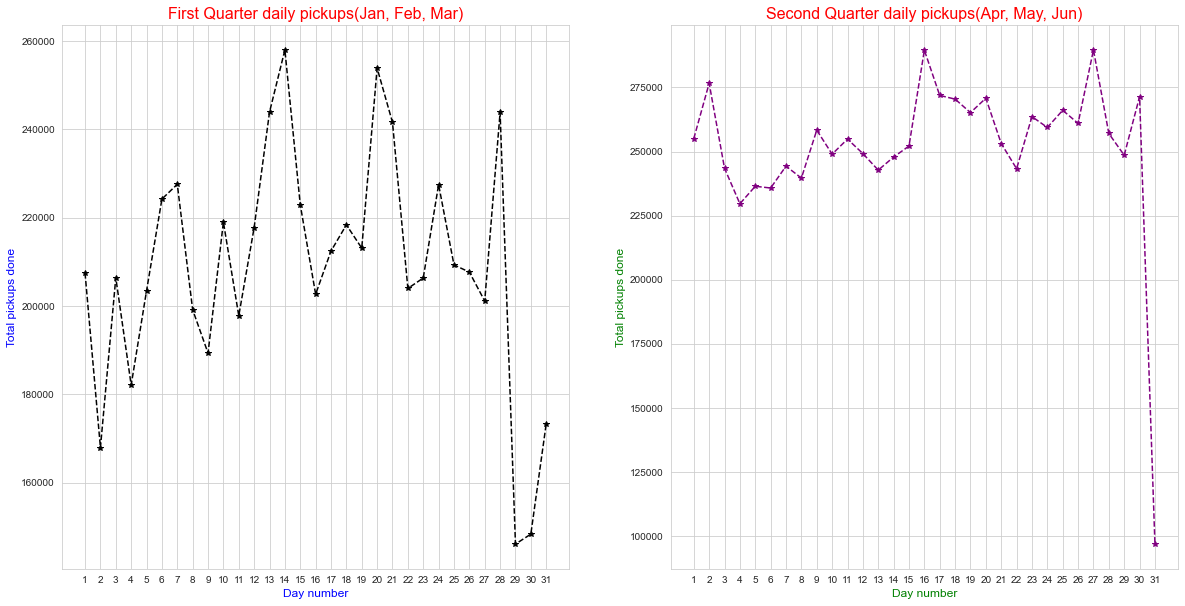

In [45]:
# Using subplots to plot both the both quarter results simultaneously
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("First Quarter daily pickups(Jan, Feb, Mar)",size=16,color='red')
plt.xlabel("Day number",size=12,color='blue')
plt.ylabel("Total pickups done",size=12,color='blue')
plt.xticks(pro1_df_24['Month_day_num'])
plt.plot(pro1_df_24['Month_day_num'],pro1_df_24['count'],marker='*',linestyle='--',color='black')

plt.subplot(122)
plt.title("Second Quarter daily pickups(Apr, May, Jun)",size=16,color='red')
plt.xlabel("Day number",size=12,color='green')
plt.ylabel("Total pickups done",size=12,color='green')
plt.xticks(pro1_df_26['Month_day_num'])
plt.plot(pro1_df_26['Month_day_num'],pro1_df_26['count'],marker='*',linestyle='--',color='purple')

It can be observed that the uber pickups were high almost for all days (except for the 31st day) during the second 
quarter when compared to the first quarter.

### Plotting which day of the week had highest pickups for each month

In [46]:
# Groupby Month and Day
pro1_df_27 = pro1_df.groupby(['Month','Day']).size().reset_index(name='count')
pro1_df_27

,Month,Day,count
0,April,Friday,340965
1,April,Monday,253079
2,April,Saturday,352202
3,April,Sunday,292863
4,April,Thursday,406837
5,April,Tuesday,269047
6,April,Wednesday,365844
7,February,Friday,380444
8,February,Monday,279665
9,February,Saturday,375296


In [47]:
# Pivot will reshape the dataframe based on column values. So here since I want to plot for days, I will
# make them as columns, ie.mon, tue,..will be columns
pro1_df_28 = pro1_df_27.pivot(index='Month',columns='Day',values='count')
pro1_df_28

# references:- https://www.youtube.com/watch?v=1h0LvhDg9NA

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,340965,253079,352202,292863,406837,269047,365844
February,380444,279665,375296,302083,342198,292470,291464
January,345532,194004,392900,234599,336532,200125,250109
June,406185,406103,440803,362125,396951,445025,359703
March,342656,289482,345696,341069,305875,353412,281583
May,466789,271919,507666,420043,371205,312823,345108


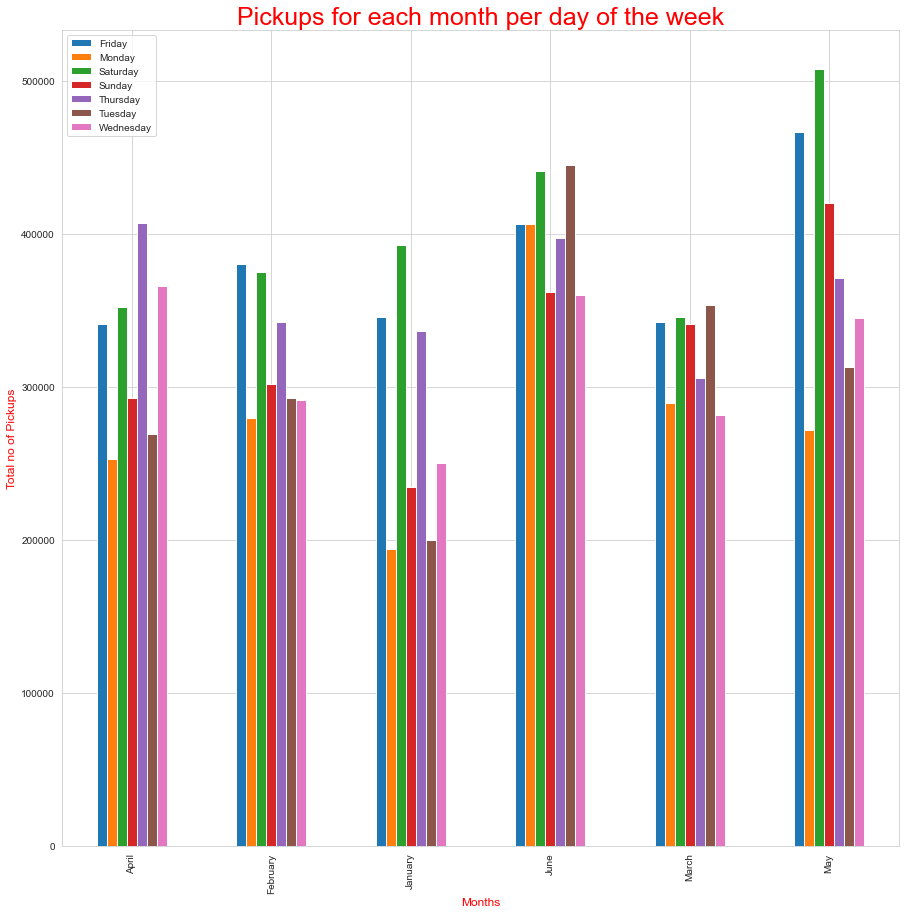

In [48]:
# Plotting the bar graph
pro1_df_28.plot(kind='bar',figsize=(15,15))

# Adding the labels and title
plt.title("Pickups for each month per day of the week",size=25,color='red')
plt.xlabel("Months",size=12,color='red')
plt.ylabel("Total no of Pickups",size=12,color='red')

# Making the legend to appear on the upper left side
plt.legend(loc='upper left')

1. It can be seen that month wise highest pickups days as below:
   1. January - Saturday has the highest pickups
   2. February - Friday has the highest pickups
   3. March - Tuesday has the highest pickups
   4. April - Thursday has the highest pickups
   5. May - Saturday has the highest pickups
   6. June - Tuesday has the highest pickups
2. Also, Mondays had the least pickups for all the months except March and June

##### Plotting a heatmap for the same above results 

<AxesSubplot:title={'center':'Pickups for each month per day of the week'}, xlabel='Day', ylabel='Month'>

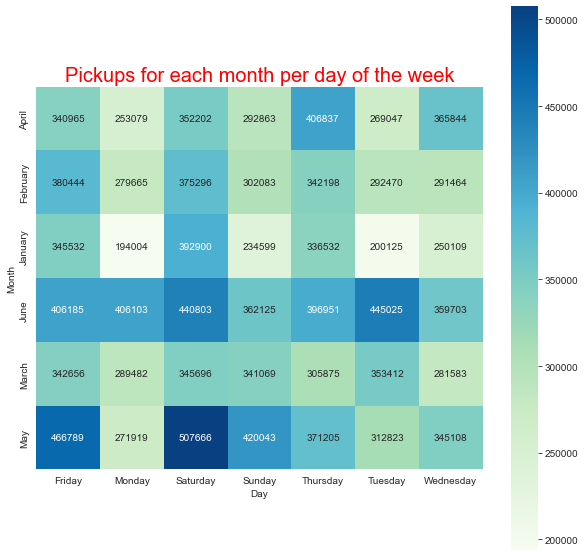

In [49]:
plt.figure(figsize=(10,10))

# customizing the title by giving size, location, color
plt.title("Pickups for each month per day of the week", size = 20, color ='red', loc = 'center')

sns.heatmap(pro1_df_28, cmap = 'GnBu', fmt = 'g', square = True,  annot = True)

# references:- https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/

Here also, it is visible that, Saturdays in the month of May had the highest pickups(dark blue color) and Mondays in 
the month of January had the least number of pickups(white color)

##### Plotting a heatmap for the same above results but without using seaborn and using matplotlib library.

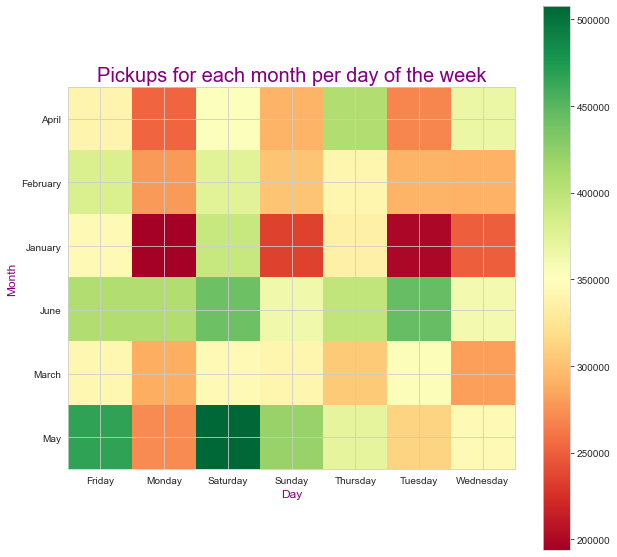

In [50]:
plt.figure(figsize=(10,10))

# using .imshow() instead of seaborn
plt.imshow(pro1_df_28, cmap='RdYlGn')

# To display the colorbar next to the heatmap
plt.colorbar()

# To add x & y values in the map
plt.xticks(range(len(pro1_df_28)+1),pro1_df_28.columns)
plt.yticks(range(len(pro1_df_28)),pro1_df_28.index)

# To display x, y & title
plt.title("Pickups for each month per day of the week", size = 20, color ='purple')
plt.xlabel("Day",size =12, color ='purple')
plt.ylabel("Month", size=12, color = 'purple')

plt.show()

# references:- https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/

### To know which Affiliated base has the maximum pickups by month wise

In [51]:
# Grouping by Month and Affiliated base num
pro1_df_29 = pro1_df.groupby(['Month','Affiliated_base_num']).size().reset_index(name='count').sort_values(
                                                                      by='count',ascending = False)
pro1_df_29

,Month,Affiliated_base_num,count
802,June,B02682,1067662
1283,May,B02682,876906
364,February,B02764,802134
591,January,B02764,771223
1065,March,B02764,746392
...,...,...,...
721,June,B02298,1
1111,May,B00208,1
1236,May,B02470,1
359,February,B02740,1


So, the Affiliated base num, 'B02682' in June has contributed to highest pickups done for all six months

### User input Affiliated base num to know the monthly pickups associated with it. 

Enter the desired Affiliated_base_num : B02011


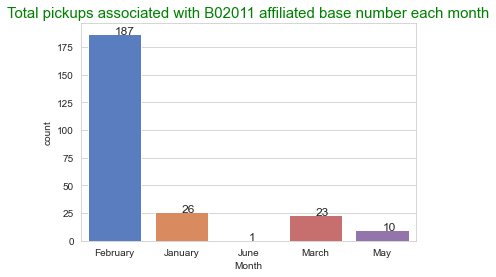

In [52]:
# First step, just writing a input function to get the affiliated base num from the user and storing it in variable
pro1_df_30 = input("Enter the desired Affiliated_base_num : ")

# Filtering the original data by the user inputted Affiliated base num
pro1_df_31 = pd.DataFrame(pro1_df[pro1_df['Affiliated_base_num']==pro1_df_30])

# To get the month wise results, I am grouping by 'Month'
pro1_df_32 = pro1_df_31.groupby(['Month']).size().reset_index(name='count')

# Plotting using sns.barplot with x axis as month and y axis as count with color palette 'muted'
sns.barplot(data= pro1_df_32, x='Month',y='count',palette='muted')

# Customizing the title by size, loc, color

# Here, I used .format() method so that, my title populates the user inputted Affiliated base num
plt.title("Total pickups associated with {} affiliated base number each month".format(pro1_df_30),color='green',
          loc='center',size=15)

# To get the y value plots
for i,v in enumerate(pro1_df_32['count']):
    plt.text(i,v,str(v), size=12)
    
# Sometimes, not all months will be displayed which means that, the Affiliated base did not have any pickups 
# for those months

So, just by entering the Affiliated_base_num, the user will be able to know the total pickups associated with that base
each month